In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [11]:
df = pd.read_csv(r"C:\Users\Robin Bhardwaj\Downloads\Advertising.csv")

In [12]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.shape

(200, 5)

In [13]:
df.drop_duplicates(inplace = True)

In [35]:
df.shape

(200, 5)

In [67]:
df.drop('Unnamed: 0',axis = 1,inplace = True)            #drop unwanted column

In [39]:
df.shape

(200, 4)

In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [69]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


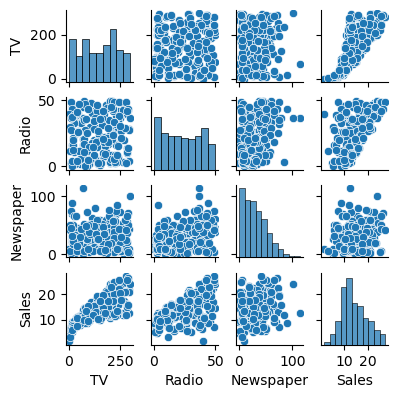

In [71]:
sns.pairplot(df[['TV','Radio','Newspaper','Sales']],height=1)

<Axes: xlabel='TV', ylabel='Count'>

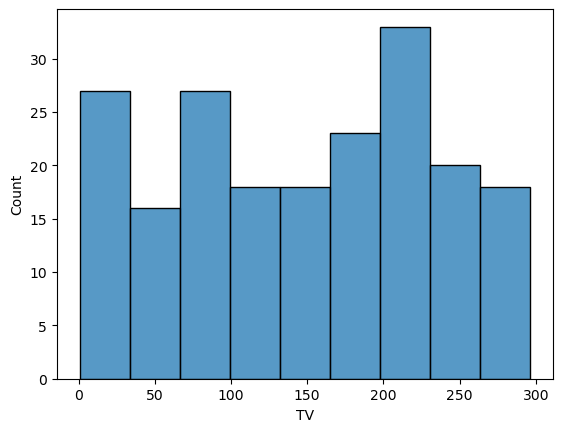

In [23]:
sns.histplot(x='TV',data = df)

<Axes: xlabel='Radio', ylabel='Count'>

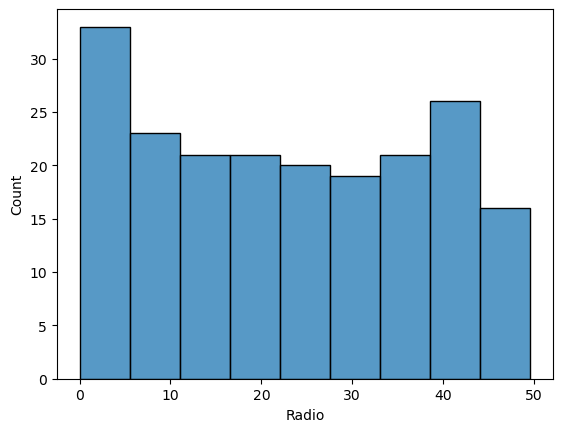

In [27]:
sns.histplot(x='Radio',data = df)

<Axes: xlabel='Newspaper', ylabel='Count'>

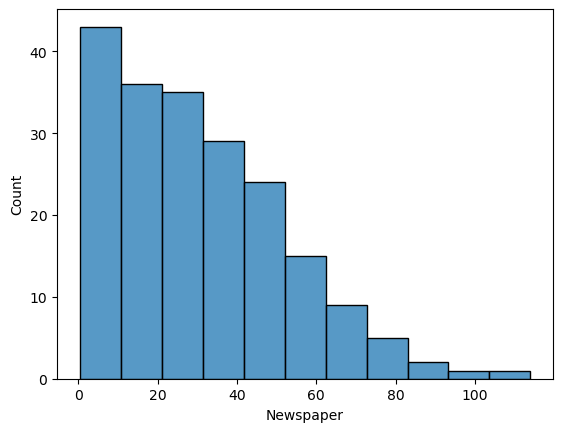

In [29]:
sns.histplot(x='Newspaper',data = df)

<Axes: xlabel='Sales', ylabel='Count'>

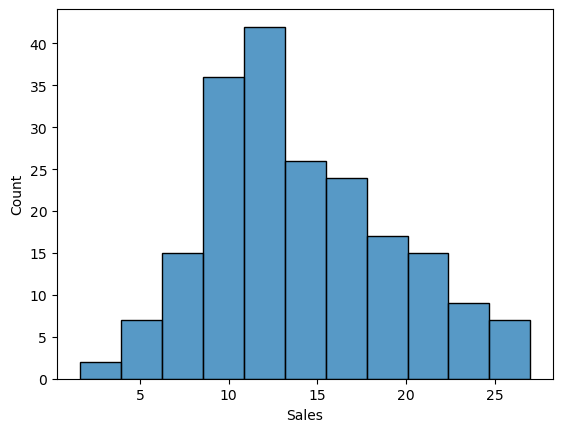

In [31]:
sns.histplot(x='Sales',data = df)

<Axes: ylabel='Sales'>

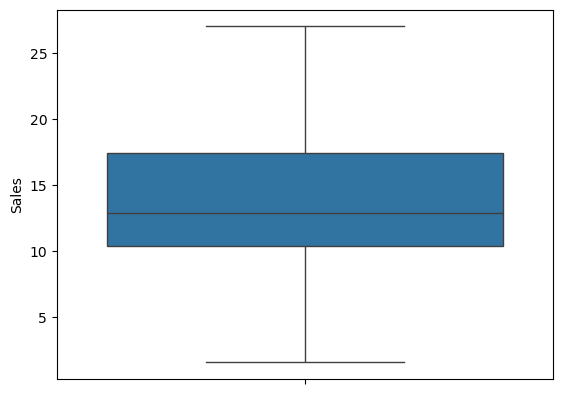

In [41]:
sns.boxplot(data = df,y="Sales")

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

# the independent variables set 
X = add_constant(df[['TV', 'Radio', 'Newspaper']] )

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

     feature       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


In [18]:
x=df.iloc[:,:-1]
 y= df["Sales"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=5)

In [49]:
print(x_test.shape)

(40, 3)


In [51]:
print(x_train.shape)

(160, 3)


In [24]:
df_train = df[df.index.isin(x_train.index)]
df_train.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


In [26]:
df_test = df[df.index.isin(x_test.index)]
df_test.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
3,4,151.5,41.3,58.5,18.5
6,7,57.5,32.8,23.5,11.8
17,18,281.4,39.6,55.8,24.4
21,22,237.4,5.1,23.5,12.5
24,25,62.3,12.6,18.3,9.7


In [28]:
import statsmodels.formula.api as smf
import numpy as np

In [30]:
lr_model = smf.ols(formula =  ' Sales ~ TV + Radio  ',data = df_train)

In [32]:
lr_model = lr_model.fit()

In [34]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     673.8
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           8.91e-78
Time:                        15:50:04   Log-Likelihood:                -311.24
No. Observations:                 160   AIC:                             628.5
Df Residuals:                     157   BIC:                             637.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9018      0.331      8.757      0.0

In [52]:
infl = lr_model.get_influence()
cooks_distance = infl.summary_frame()['cooks_d']
cooks_distance

0      0.005094
1      0.008092
2      0.033318
4      0.000274
5      0.131452
         ...   
194    0.001032
196    0.004660
197    0.000012
198    0.010807
199    0.008974
Name: cooks_d, Length: 160, dtype: float64

In [38]:
cooks_distance[cooks_distance > 1]                    #its mean no row greater than 1


Series([], Name: cooks_d, dtype: float64)

In [40]:
from sklearn.metrics import r2_score

In [42]:
predictions = lr_model.predict(df_test)
print(r2_score(predictions,df_test['Sales']))

0.8929829910813496


<Axes: xlabel='Sales', ylabel='None'>

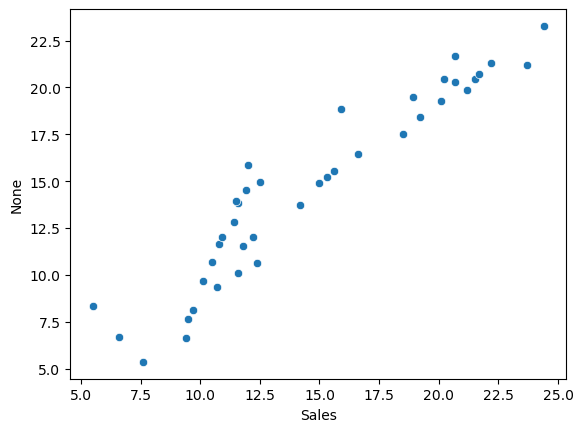

In [65]:
sns.scatterplot(x=df_test['Sales'],y= predictions)